## Input

In [2]:
import pandas as pd
df = pd.read_csv(r'Tweets.csv')

In [45]:
import matplotlib.pyplot as plt

In [3]:
# Dropping the row 
df.drop([314], inplace = True)

## Preprocessing

In [4]:
#seperating the label
y=df['sentiment'].values
M=df['text'].tolist()

In [5]:
import re
X1=[]
for item in M:
    X1.append(re.sub(r'([a-zA-Z0-9_<>-])\1+', r'\1\1', item))

In [6]:
tempX=[]
for item in X1:
    iteml=item.lower()
    item1=iteml.replace('2day ','today ')
    item2=item1.replace('2moro ','tomorrow ')
    item3=item2.replace('2morrow ','tomorrow ')
    item4=item3.replace('2night ','tonight ')
    item5=item4.replace('2nite ','tonight ')
    item6=item5.replace('b-day ','birthday ')
    item7=item6.replace('b4 ','before ')
    item8=item7.replace('bb ','be back ')
    item9=item8.replace('bbl ','be back later ')
    item10=item9.replace('bc ','because ')
    item11=item10.replace('bday ','birthday ')
    item12=item11.replace('belive ','believe ')
    item13=item12.replace('bf ','boyfriend ')
    item14=item13.replace('bff ','best freind forever ')
    item15=item14.replace('brb ','be right back ')
    item16=item15.replace('bros ','bro ')
    item17=item16.replace('bs ','bullshit ')
    item18=item17.replace('btw ','by the way ')
    item19=item18.replace('dat ','that ')
    item20=item19.replace('doc ','doctor ')
    item21=item20.replace('docs ','doctor ')
    item22=item21.replace('hott ','hot ')
    item23=item22.replace('fb ','facebook ')
    item24=item23.replace('jk ','just kidding ')
    item25=item24.replace('jst ','just ')
    item26=item25.replace(' ng ',' nice game ')
    item27=item26.replace('nt ','nice try ')
    item28=item27.replace('ok ','okay ')
    item29=item28.replace('okayy ','okay ')
    item30=item29.replace('omgg ','omg ')
    item31=item30.replace('ppl ','people ')
    item32=item31.replace('tonite ','tonight ')
    item33=item32.replace(' u ',' you ')
    item34=item33.replace('u2 ','you too ')
    item35=item34.replace('ugg ','ugh ')
    item36=item35.replace('uggh ','ugh ')
    item37=item36.replace('uh ','ugh ')
    item38=item37.replace('uhh ','ugh ')
    item39=item38.replace('umm ','um ')
    item40=item39.replace('ur ','your ')
    item41=item40.replace('waah ','waa ')
    item42=item41.replace('wah ','waa ')
    item43=item42.replace('waay ','waa ')
    item44=item43.replace('xoxo ','xo ')
    item45=item44.replace('xx ','xo ')
    item46=item45.replace(' y ',' why ')
    item47=item46.replace('whyy ','why ')
    item48=item47.replace('yaay ','ya ')
    item49=item48.replace('yah ','ya ')
    item50=item49.replace('juss ','just ')
    item51=item50.replace('whassqoodd ','whats good') 
    item52=item51.replace('soo ','so ')
    tempX.append(item52)

In [7]:
# import TweetTokenizer() method from nltk
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

In [8]:
# create a function for the tweet tokenizer from NLTK
def tok(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [9]:
#selecting the stop words
stopwords =['!','#','$','%','&',"'",'*','(',')','+', ',','-','.','/',':',';','<','=','>'
              ,'?','@','[','\\',']','^','_','`','{','|','}','~','¿','#bgt','#fail','#fb'
              ,'#ff','#followfriday','#hhrs','#judday','#sanctuarysunday','#starwarsday'
              ,'#twpp','>','_','_127','__','_b','_benson','_c','_carter','_d','_guy','_henrie'
              ,'_j','_m','_marie','_skies','_x','_xo']

In [10]:
# creating a function for the pipeline to remove stop words
def remove_stop(tokens):
    return [t for t in tokens if t not in stopwords]

In [11]:
# creating a function to use each function from the pipeline on the texts
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens     

In [12]:
# selecting the functions for the pipeline
pipeline = [tok,remove_stop,]
# using the pipelined list of functions.
Xtemp=[]
for tweet in tempX:
    Xtemp.append(prepare(tweet,pipeline))

In [13]:
#creating a new list
X=[]
#joining the lists of lists
#so a list of stirngs remains
for tweet in Xtemp:
    X.append(' '.join(tweet))

## New feature set vectorization and df creation

In [14]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
stemmer = PorterStemmer()
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [15]:

from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem = TfidfVectorizer(encoding='latin-1'
                                                                   , use_idf=True
                                                                   , min_df=5
                                                                   ,tokenizer=tok
                                                                   ,analyzer=stemmed_words)
#vectorizing using count
vecs = unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.fit_transform(X)

vecsdf=pd.DataFrame(vecs.toarray(),
            columns=unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.get_feature_names_out())

## new feature set word count

In [16]:
words=[]
for review in X:
    words.append(tok(review))

In [17]:
word_count =[]
for review in words:
    count =0
    for word in review:
        count=count+1
    word_count.append(count)

In [18]:
import numpy as np
word_array = np.asarray(word_count)
word_norm = (word_array - word_array.min())/ (word_array.max() - word_array.min())

In [19]:
vecsdf['word_norm']=word_norm

## Negation

In [20]:
import re
def has_negation(post):
    pattern_neg_1 = re.compile(r'\b(not|no|never)\b')
    pattern_neg_2 = re.compile(r'\b([a-z]+less)\b')
    if pattern_neg_1.search(post.lower()) or pattern_neg_2.search(post.lower()):
        return 1
    else: 
        return 0

In [21]:
neg_count=[]
for item in X:
    neg_count.append(has_negation(item))

In [22]:
neg_array = np.asarray(neg_count)
neg_norm = (neg_array - neg_array.min())/ (neg_array.max() - neg_array.min())

In [23]:
vecsdf['neg_norm']=neg_norm

In [24]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import numpy as np
svm_model_final = svc.fit(vecsdf,y)

In [26]:
svm_cv_scores_final = cross_val_score(svc, vecsdf, y, cv=5)

In [27]:
svm_cv_neu_f_scores_final = cross_val_score(svc,vecsdf, y,scoring=make_scorer(f1_score, average='weighted', labels=['neutral']),cv=5)

In [28]:
svm_cv_neg_f_scores_final = cross_val_score(svc,vecsdf, y,scoring=make_scorer(f1_score, average='weighted', labels=['negative']),cv=5)

In [29]:
svm_cv_pos_f_scores_final = cross_val_score(svc,vecsdf, y,scoring=make_scorer(f1_score, average='weighted', labels=['positive']),cv=5)

In [30]:
svm_cv_score_final = np.mean(svm_cv_scores_final)
svm_cv_neu_f_score_final = round(np.mean(svm_cv_neu_f_scores_final),5)
svm_cv_neg_f_score_final = round(np.mean(svm_cv_neg_f_scores_final),5)
svm_cv_pos_f_score_final = round(np.mean(svm_cv_pos_f_scores_final),5)

In [31]:
print('final accuracy:',svm_cv_score_final)
print('final neutral f score:',svm_cv_neu_f_score_final )
print('final negative f score:', svm_cv_neg_f_score_final)
print('final positive f score:',svm_cv_pos_f_score_final )

final accuracy: 0.7146652110625908
final neutral f score: 0.70677
final negative f score: 0.67853
final positive f score: 0.75833


In [38]:
feature_ranks = sorted(zip(svc.coef_[0], unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.get_feature_names_out()))
negative_features = feature_ranks[-30:]
for i in negative_features:
    print(i)

(3.1784691494256805, 'terribl')
(3.204760283961159, 'wrong')
(3.226268739648617, 'die')
(3.229236189976712, 'lost')
(3.241970125686123, 'kill')
(3.252579188058756, 'disappoint')
(3.305215099124725, 'ugh')
(3.364549776146055, 'afraid')
(3.397811011166276, 'piss')
(3.413707168192878, 'dammit')
(3.467092284431608, 'feel')
(3.524410789968554, 'hard')
(3.586874609140475, 'headach')
(3.771460493207064, 'cri')
(3.7986371052240813, 'bad')
(3.8372779721152015, 'wtf')
(3.853507822268279, 'worst')
(3.895827064140285, 'tire')
(3.988445099914868, 'sadli')
(4.184830232441888, 'sick')
(4.186993116596083, 'hurt')
(4.220091433475577, 'poor')
(4.364630946401505, 'bore')
(5.043889997314054, 'stupid')
(5.249058347232768, 'fail')
(5.273234081630445, 'suck')
(5.443930212829187, 'sorri')
(5.641670082557145, 'hate')
(5.730133142056516, 'sad')
(6.445395623276589, 'miss')


In [39]:
feature_ranks = sorted(zip(svc.coef_[1], unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.get_feature_names_out()))
neutral_features = feature_ranks[-30:]
for i in neutral_features:
    print(i)

(2.0857589266099374, 'gut')
(2.0860663503157575, 'unfortun')
(2.138044787351576, 'headach')
(2.195578802853793, 'mess')
(2.2079102349765374, 'depress')
(2.216545077949718, 'don')
(2.238883127949649, 'ugli')
(2.3663898421048204, 'disappoint')
(2.406464372801823, 'sadli')
(2.562937179300522, 'wrong')
(2.5763148229356014, 'jealou')
(2.651388341501538, 'lost')
(2.686645851211817, 'ugh')
(2.7114432216136906, 'worst')
(2.794365815500079, 'doesn')
(2.8067143108733044, 'hard')
(2.858110843529457, 'sick')
(2.9929561458590435, 'hurt')
(3.0525415854327225, 'bad')
(3.092505511262141, 'tire')
(3.340466244838611, 'fail')
(3.368835972220917, 'stupid')
(3.444589920037217, 'poor')
(3.7408656847487833, 'not')
(4.030081330602095, 'bore')
(4.173797116069788, 'suck')
(4.602688741059809, 'hate')
(4.6625599825215005, 'sorri')
(5.165939358417438, 'sad')
(5.547082716182128, 'miss')


In [40]:
feature_ranks = sorted(zip(svc.coef_[2], unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.get_feature_names_out()))
positive_features = feature_ranks[-30:]
for i in positive_features:
    print(i)

(1.5935792061548617, 'afraid')
(1.6632444518038378, 'rough')
(1.6767897376240646, 'ugli')
(1.6790407452650293, 'weren')
(1.682758706645847, 'except')
(1.6880508134267238, 'lame')
(1.722765538624321, 'certainli')
(1.7279681829706046, 'scare')
(1.760847679407707, 'nervou')
(1.7661222262195793, 'but')
(1.8612178575030294, 'stuck')
(1.8691120516671926, 'miser')
(1.9079616797571257, 'horribl')
(2.114194490581017, 'exhaust')
(2.148708356648258, 'pain')
(2.2023555001719775, 'broke')
(2.775437898881879, 'poor')
(2.7866817164540136, 'sadli')
(3.1559857546487646, 'jealou')
(3.329506525571229, 'unfortun')
(3.6254574487138567, 'hate')
(3.845921039054991, 'bad')
(3.873038156477933, 'sick')
(4.020757426357748, 'shame')
(4.064026432633227, 'suck')
(4.331288702451573, 'bore')
(4.404962165737751, 'tire')
(5.125207615694397, 'sorri')
(5.519481674905419, 'miss')
(5.693139838960056, 'sad')


In [41]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

In [43]:
feature_names = unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.get_feature_names_out()

In [56]:
final_model_dict = {}

In [59]:

final_model_dict['svm_cv_scores_final']=svm_cv_score_final
final_model_dict['svm_cv_neg_f_scores_final']=svm_cv_neg_f_score_final
final_model_dict['svm_cv_neu_f_scores_final']=svm_cv_neu_f_score_final
final_model_dict['svm_cv_pos_f_scores_final']=svm_cv_pos_f_score_final



In [60]:
for i,v in final_model_dict.items():
    print(i,v)

svm_cv_scores_final 0.7146652110625908
svm_cv_neg_f_scores_final 0.67853
svm_cv_neu_f_scores_final 0.70677
svm_cv_pos_f_scores_final 0.75833


In [64]:
values = list(final_model_dict.values())

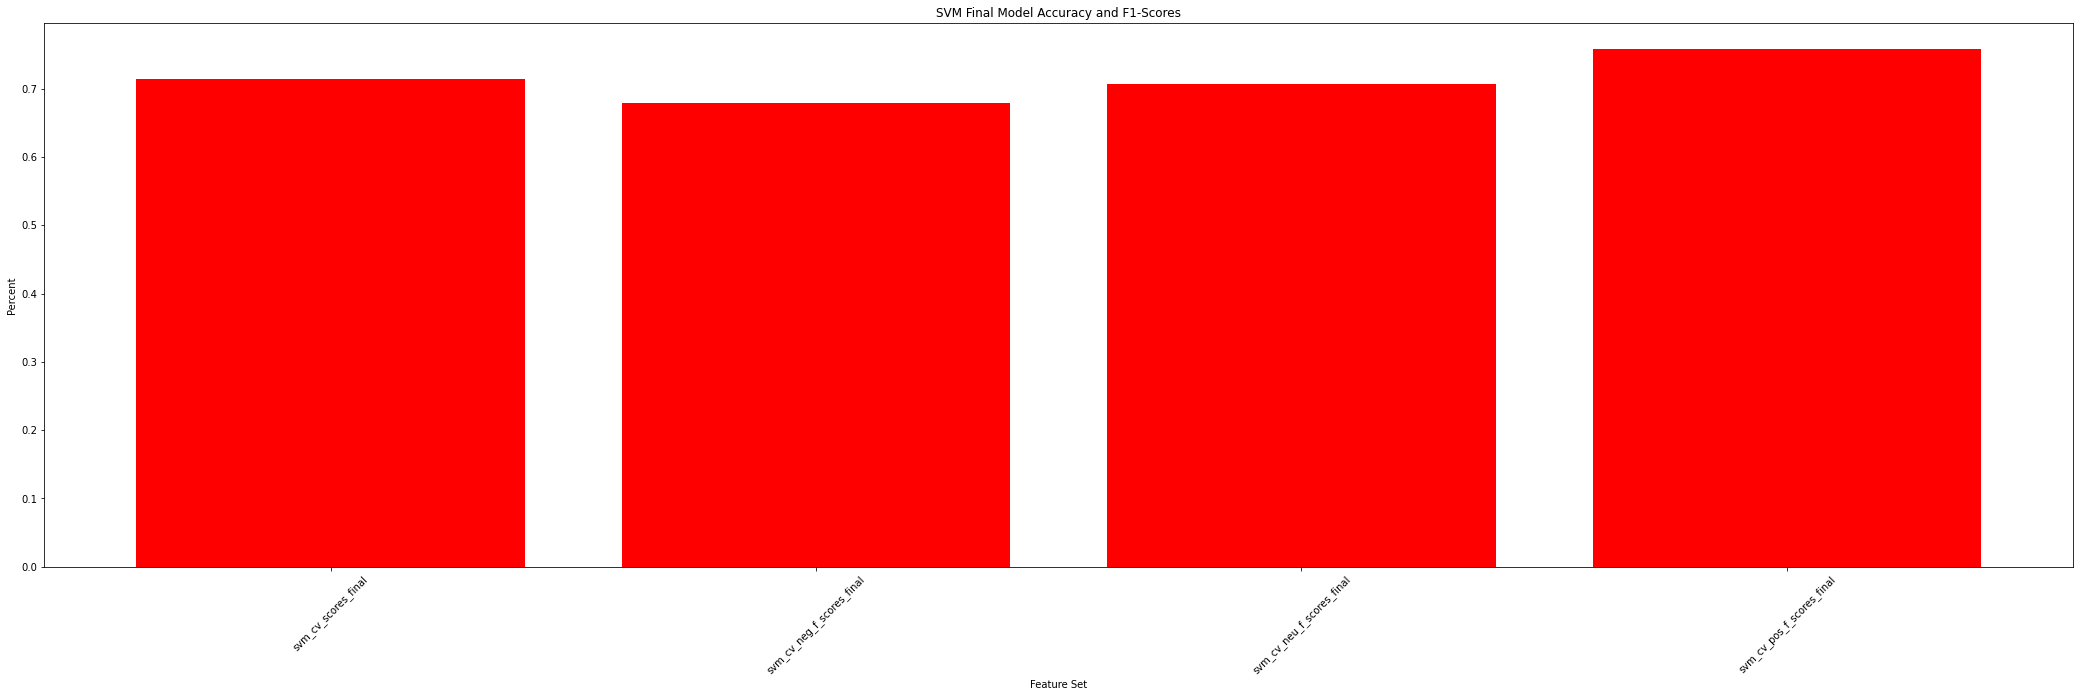

In [69]:
import matplotlib.pyplot as plt




values = list(final_model_dict.values())
names = list(final_model_dict.keys())
colors = ['red','red','red','red']
plt.figure(figsize=(80, 10))



plt.subplot(121)
plt.bar(names,values,color= colors)



plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Feature Set')
plt.title('SVM Final Model Accuracy and F1-Scores')




plt.show()

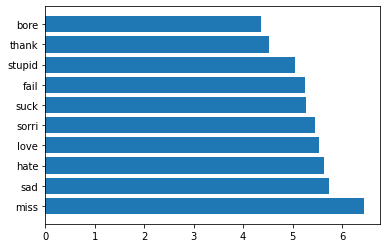

In [46]:
f_importances(abs(svm_model_final.coef_[0]), feature_names, top=10)